In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cek sub-direktori
!ls /content/drive/Shareddrives/Capstone/DatasetBaru


historical  makanan  museum  nature_adventure  park  waterpark	zoo


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [ ]:
# data direktori
DATA_DIR="/content/drive/Shareddrives/Capstone/DatasetBaru"

In [ ]:
import cv2
import imghdr

In [ ]:
# ekstensi gambar yang support
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
# menghapus gambar selain ekstensi yang disupport
for image_class in os.listdir(DATA_DIR):
    for image in os.listdir(os.path.join(DATA_DIR, image_class)):
        image_path = os.path.join(DATA_DIR, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        # menghapus gambar yang tidak dapat dibuka
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
import numpy as np

In [ ]:
# data pipeline
data = tf.keras.utils.image_dataset_from_directory('/content/drive/Shareddrives/Capstone/DatasetBaru')

Found 931 files belonging to 7 classes.


In [ ]:
# merubah tf.dataset menjadi numpy
data_iterator = data.as_numpy_iterator()

In [ ]:
# mengambil satu batch
batch = data_iterator.next()

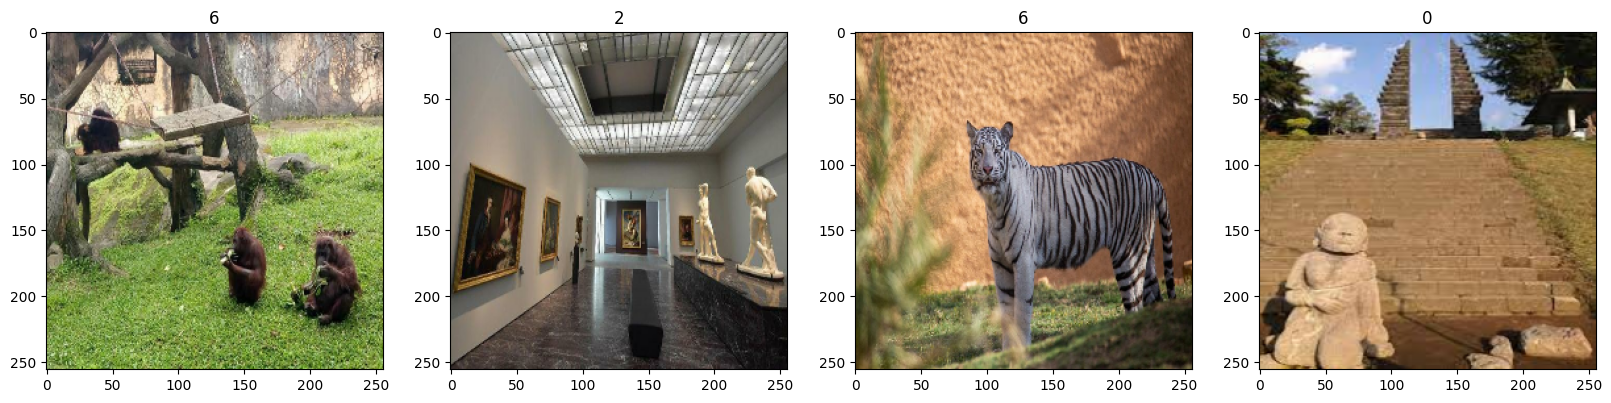

In [ ]:
# visualisasi batch
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# normalisasi values
data = data.map(lambda x,y: (x/255, y))

In [ ]:
# inspect batch
data.as_numpy_iterator().next()

(array([[[[0.16470589, 0.35686275, 0.61960787],
          [0.16706495, 0.35922182, 0.6219669 ],
          [0.18030773, 0.3724646 , 0.6352097 ],
          ...,
          [0.159735  , 0.332284  , 0.5714997 ],
          [0.15630177, 0.32885078, 0.5680665 ],
          [0.15111826, 0.3236673 , 0.56288296]],
 
         [[0.16470589, 0.35686275, 0.61960787],
          [0.16517125, 0.35732812, 0.6200732 ],
          [0.17017463, 0.3623315 , 0.6250766 ],
          ...,
          [0.15371476, 0.3262638 , 0.57177544],
          [0.15622331, 0.32877234, 0.57428396],
          [0.16001073, 0.33255973, 0.57807136]],
 
         [[0.16585496, 0.3580118 , 0.6207569 ],
          [0.16995251, 0.36210936, 0.62485445],
          [0.16166423, 0.3538211 , 0.6165662 ],
          ...,
          [0.15426624, 0.32681525, 0.57387406],
          [0.15633532, 0.32888436, 0.5759432 ],
          [0.15945925, 0.33200827, 0.5790671 ]],
 
         ...,
 
         [[0.00997243, 0.0256587 , 0.03742341],
          [0.02957

In [ ]:
# jumlah batch
len(data)

30

In [ ]:
# membagi dataset menjadi train, validation, dan test
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

print(f"Train Size: {len(train)}")
print(f"Validation Size: {len(val)}")
print(f"Test Size: {len(test)}")

Train Size: 21
Validation Size: 6
Test Size: 3


In [ ]:
# model dengan CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# inspect model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       7,373,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,389,191 (28.19 MB)

 Trainable params: 7,389,191 (28.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# inisiasi callback
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] == 1 and logs['val_accuracy'] == 1:
            self.model.stop_training = True

            print("\nReached 100% train accuracy and 100% validation accuracy, so cancelling training!")

In [ ]:
EPOCHS=50

In [ ]:
# train model
hist = model.fit(
    train,
    epochs=EPOCHS,
    validation_data=val,
    callbacks=[EarlyStoppingCallback()]
)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 255s 12s/step - accuracy: 0.2500 - loss: 2.5458 - val_accuracy: 0.4323 - val_loss: 1.5114
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4774 - loss: 1.4021 - val_accuracy: 0.6146 - val_loss: 1.0945
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 688ms/step - accuracy: 0.6069 - loss: 1.0795 - val_accuracy: 0.7604 - val_loss: 0.8056
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 668ms/step - accuracy: 0.7048 - loss: 0.8255 - val_accuracy: 0.7865 - val_loss: 0.7222
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 749ms/step - accuracy: 0.8416 - loss: 0.5153 - val_accuracy: 0.7917 - val_loss: 0.5749
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 763ms/step - accuracy: 0.8990 - loss: 0.4089 - val_accuracy: 0.7083 - val_loss: 0.8725
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 674ms/step - accuracy: 0.8543 - loss: 0.4373 - val_accuracy: 0.8646 - val_loss: 0.4162
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 755ms/step - accuracy: 0.9632 - loss: 0.1678 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.9694 - loss: 0.0872
Validation Loss: 0.050237953662872314
Validation Accuracy: 0.984375


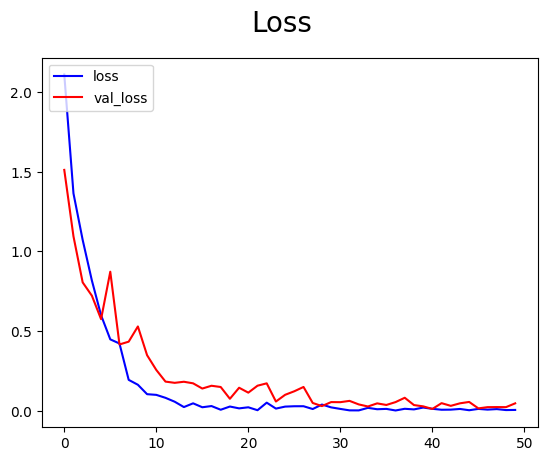

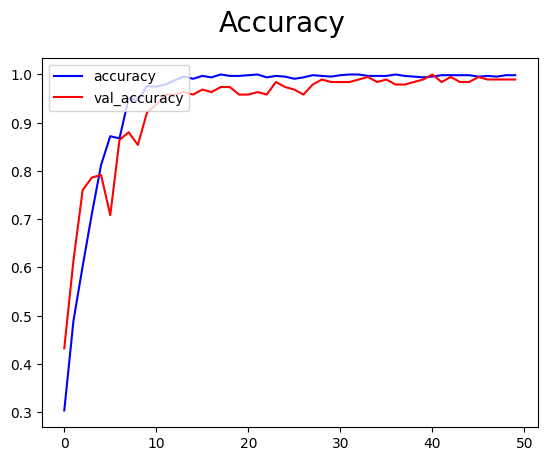

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
# Evaluasi model pada test dataset
test_loss, test_accuracy = model.evaluate(test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 507ms/step - accuracy: 0.9886 - loss: 0.0187
Test Loss: 0.02359290048480034
Test Accuracy: 0.9850746393203735


In [50]:
# Membuat prediksi pada test dataset
predictions = model.predict(test)

# Konversi prediksi probabilitas ke label
predicted_labels = np.argmax(predictions, axis=1)

# Data label asli
true_labels = np.concatenate([y.numpy() for _, y in test], axis=0)

# Tampilkan perbandingan
for i, (pred, true) in enumerate(zip(predicted_labels[:10], true_labels[:10])):
    print(f"Predicted: {class_names[pred]}, True: {class_names[true]}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step
Predicted: zoo, True: park
Predicted: historical, True: makanan
Predicted: nature_adventure, True: zoo
Predicted: historical, True: nature_adventure
Predicted: historical, True: makanan
Predicted: zoo, True: makanan
Predicted: historical, True: nature_adventure
Predicted: nature_adventure, True: nature_adventure
Predicted: museum, True: zoo
Predicted: museum, True: park


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


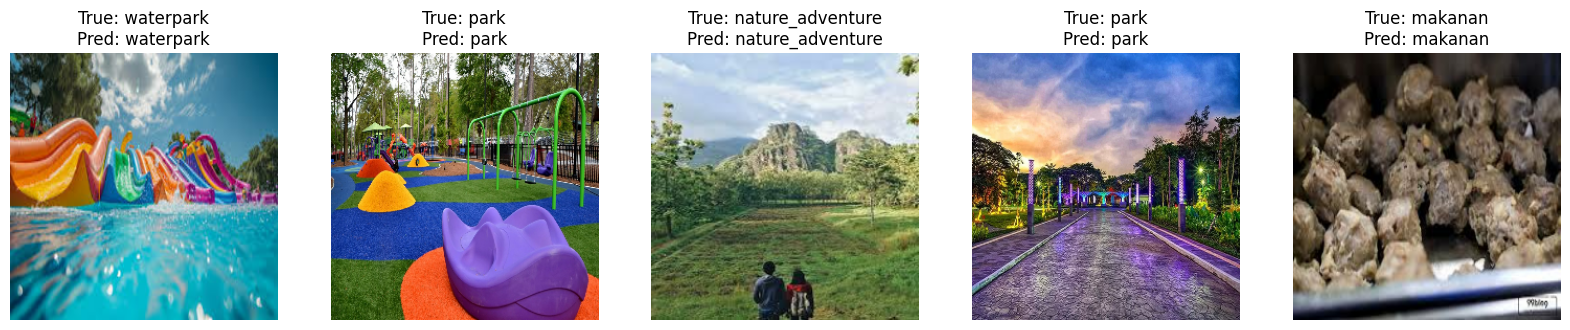

In [52]:
import random

# Iterasi dataset testing dan visualisasi beberapa contoh
test_data_iterator = test.as_numpy_iterator()
test_batch = test_data_iterator.next()

fig, axes = plt.subplots(ncols=5, figsize=(20, 10))
for idx, ax in enumerate(axes):
    img = test_batch[0][idx]
    true_label = class_names[test_batch[1][idx]]
    pred_probs = model.predict(np.expand_dims(img, axis=0))
    pred_label = class_names[np.argmax(pred_probs)]

    ax.imshow(img)
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')
plt.show()


In [ ]:
# daftar nama kelas
class_names = ['historical', 'makanan', 'museum', 'nature_adventure', 'park', 'waterpark', 'zoo']

# fungsi untuk memuat gambar
def prepare_image(image_path, img_size=(256, 256)):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        img = img / 255.0
        return np.expand_dims(img, axis=0)
    except Exception as e:
        print(f"Error in processing the image: {e}")
        return None

# fungsi untuk membaca seluruh gambar di direktori
def process_directory(directory_path):
    results = []
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):  # Memastikan ini adalah file, bukan folder
            test_image = prepare_image(file_path)
            if test_image is not None:
                predictions = model.predict(test_image)
                predicted_class_idx = np.argmax(predictions)
                confidence = np.max(predictions)
                predicted_class_name = class_names[predicted_class_idx]

                # Menyimpan hasil prediksi
                results.append({
                    'file_path': file_path,
                    'predicted_class': predicted_class_name,
                    'confidence': confidence
                })

                # Menampilkan hasil prediksi
                plt.imshow(cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB))
                plt.title(f"Predicted: {predicted_class_name}")
                plt.axis('off')
                plt.show()

                print(f"File: {file_path}\nPredicted: {predicted_class_name}\nConfidence: {confidence:.2f}\n")
            else:
                print(f"Failed to process image: {file_path}")
    return results

# path direktori untuk testing
test_directory_path = "/content/drive/MyDrive/Tes/"

# memproses semua gambar dalam direktori
results = process_directory(test_directory_path)


Output hidden; open in https://colab.research.google.com to view.